In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# 좌표 범위
x_min = 126.76
x_max = 127.19
y_min = 37.42
y_max = 37.71

# grid 개수
x_grid = 43
y_grid = 29

# 데이터 불러오기
os.chdir('/content/gdrive/My Drive/DS')

station = pd.read_csv('측정소 위치.csv')

x = station.values[0].tolist()
y = station.values[1].tolist()

In [0]:
import sys
from matplotlib import cm
import scipy as sp
import scipy.interpolate

x_grid = np.linspace(x_min, x_max, x_grid)
y_grid = np.linspace(y_min, y_max, y_grid)
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')

[27 37 40 39 46 40 37 30 40 34 29 29 43 47 35 37 49 33 37 43 27 37 34 27
 27]


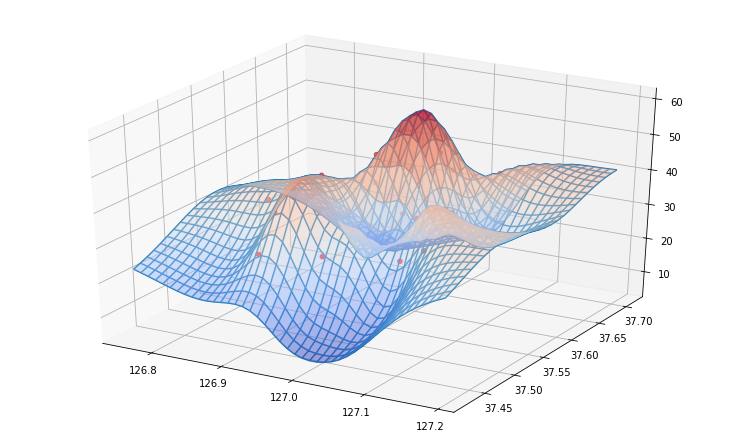

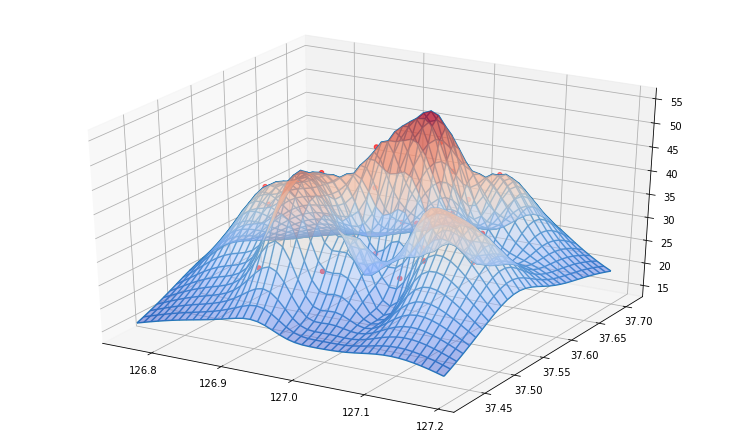

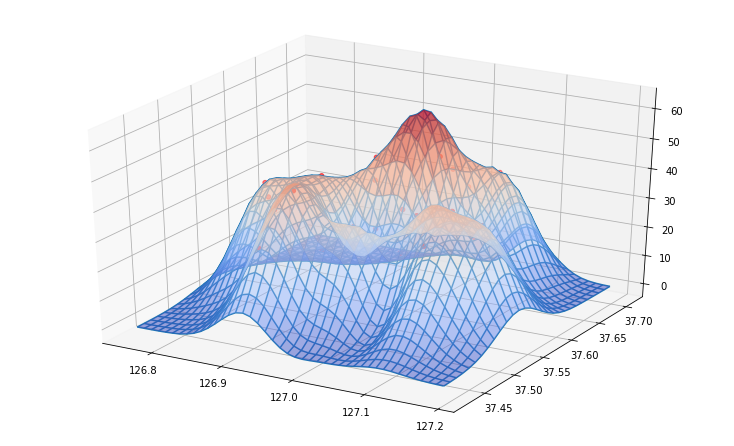

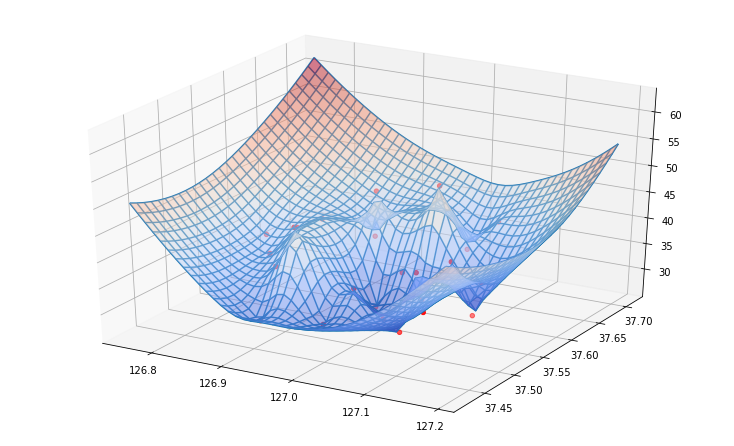

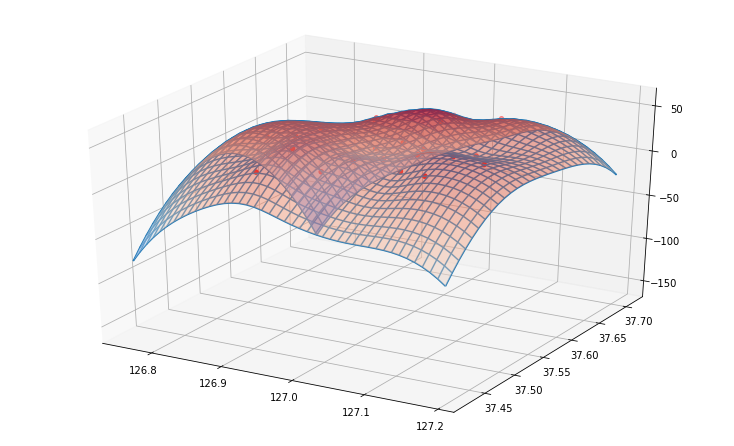

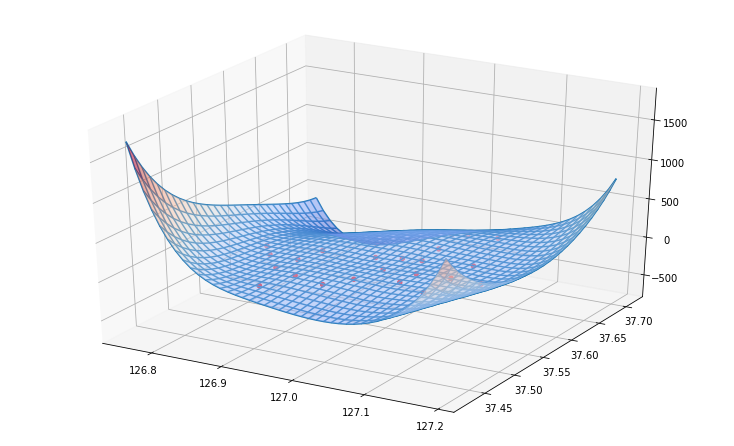

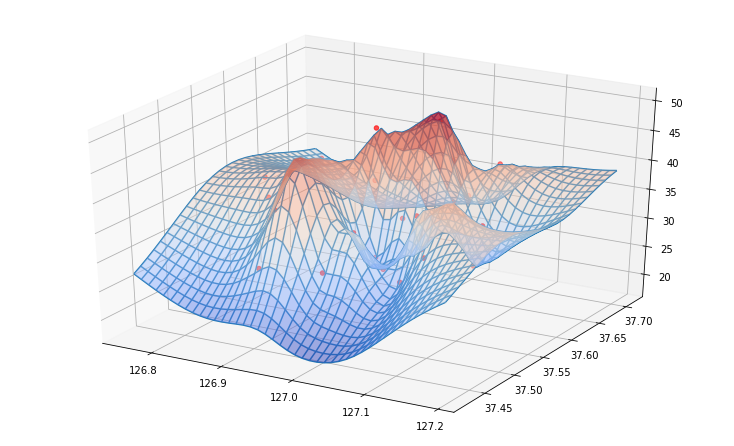

In [0]:
import csv

fieldnames = ['시간','강남구','강동구','강북구','강서구','관악구','광진구','구로구','금천구','노원구','도봉구','동대문구','동작구','마포구','서대문구','서초구','성동구','성북구','송파구','양천구','영등포구','용산구','은평구','종로구','중구','중랑구']
function = ['multiquadric', 'inverse', 'gaussian', 'linear', 'cubic', 'quintic', 'thin_plate']

os.chdir('/content/gdrive/My Drive/DS')

z = pd.read_csv('PM10.csv').values[0][1:]
z = z.astype(int)
print(z)

Z = np.zeros((len(x), len(z)))

os.chdir('./버전별그래프')
for f in function: 
  spline = sp.interpolate.Rbf(x,y,z, function=f)

  Z = spline(B1,B2)

  fig = plt.figure(figsize=(10,6))
  ax = axes3d.Axes3D(fig)
  ax.plot_wireframe(B1, B2, Z)
  ax.plot_surface(B1, B2, Z, cmap=cm.coolwarm, alpha=0.5)
  ax.scatter3D(x,y,z, c='r')
  
  fig.savefig('{f}.png'.format(f=f))